# Описание проекта

    Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

    Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Содержание проекта

<b> Шаг 1. Изучить общую информацию   <b>
    
Доступные данные:
    
1. /datasets/games.csv 
     

<b> Шаг 2. Подготовка данных <b>
    
1. Замените названия столбцов (приведите к нижнему регистру);
    
2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
    
3. Обработайте пропуски при необходимости:
    
    3.1 Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    
    3.2 Опишите причины, которые могли привести к пропускам;
    
    3.3 Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    

4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

<b> Шаг 3. Анализ данных <b>
    
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    
4. Не учитывайте в работе данные за предыдущие годы.
    
5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    
6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
    
7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    
8. Соотнесите выводы с продажами игр на других платформах.
    
9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<b> Шаг 4. Составьте портрет пользователя каждого региона <b>
    
Определите для пользователя каждого региона (NA, EU, JP):
    
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    
- Самые популярные жанры (топ-5). Поясните разницу.
    
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<b> Шаг 5. Проверьте гипотезы <b>
    
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


## Откройте файл с данными и изучите общую информацию

In [1]:
# импорт библиотек для чтения таблик и визуализации данных
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.set_option('display.float_format', '{:,.2f}'.format)
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Проверим пропуски
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
# Проверим дубликаты
df.duplicated().sum()

0

Text(0, 0.5, 'Количество игр')

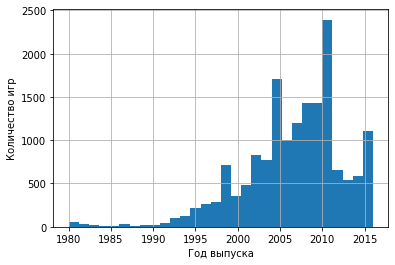

In [5]:
df['Year_of_Release'].hist(bins=30)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

## Подготовка данных

### Заменим названия столбцов

In [6]:
df.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales',
             'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
            axis = 'columns', inplace = True)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


### Приведем данные к нужному типу

In [7]:
# Удалим пропуски в столбце 'year_of_release' 
df.dropna(subset=['year_of_release'], inplace=True)
# Изменили тип на целый
df['year_of_release'] = df['year_of_release'].astype('int')
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


В столбце 'year_of_release' 269 пропусков, т.к. восстановить дату релиза не можем и таких пропусков меньше 2% удалим их. 

Заменили тип на "инт", т.к. нужен только год выпуска игры.

In [8]:
# Заменим пропуски в столбцах на 0 'critic_score' и 'user_score', т.к. скорей всего на момент сбора 
# данных не было оценок критиков и пользователей.
import numpy as np
df['critic_score'] = df['critic_score'].fillna('-1').astype('int')
# заменим tbd (to be determined)  на 0 
df['user_score'] = df['user_score'].replace('tbd', '0')
df['user_score'] = df['user_score'].fillna('-1')
df['user_score'] = pd.to_numeric(df['user_score'])
# округлим оценку до целых
df['user_score'] = np.ceil(df['user_score']).astype('int')
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,9,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,9,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,7,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,9,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1,NaN


In [9]:
# Есть два пропуска в столбце 'name' и 'genre' это две игры 1993 года,
# т.к. решил сбрать статистику с 2010 года удалим их
df[df['genre'].isna()]
df.dropna(subset=['genre'], inplace=True)

In [10]:
genre_game = df['genre'].unique()
genre_game 

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [11]:
# В столбце rating часто повторяется один и тот же тип оценки для одинаковых жанров.
# Восстановим пропуски по ESRB рейтингу в жанре.
# Создадим словарь с обозначением жанров
genre_game = df['genre'].unique()
genre_list = {}
for genre in genre_game:
    genre_count = df[df['genre'] == genre]['rating'].value_counts()
    genre_list[genre] = genre_count.index[0]

# Создадим функцию поиска по столбцу 'rating' '0' и замене соответсвующему обазночению
def rating(row):
    if row[10] == '0':
        row[10] = genre_list[row[3]]
    return row
df['rating'] = df['rating'].fillna('RP')   
df = df.apply(rating, axis=1)

# Т.к. категории E и K-A по смыслу являются одинаковыми замени на Е
df['rating'] = df['rating'].replace('K-A', 'E')

df['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [12]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null int64
rating             16444 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


### Cуммарные продажи во всех регионах

In [13]:
# Добваим новый столбец 'total_sales'
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,9,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,9,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,7,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,9,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1,RP,28.31


Вывод: данные готовы к анализу.

## Анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

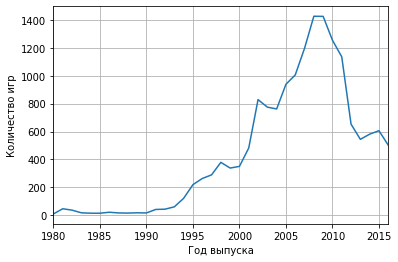

In [14]:
year_release = df.groupby('year_of_release')['name'].count()
year_release.plot()
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid()

Вывод: Будем анализировать период с 2000 по 2016, т.к. в срезе выпускалось больше всего игр.

### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [15]:
# Продажи по годам
platform_sales = (df.query('year_of_release >= 2000')
                  .pivot_table(index='platform', columns='year_of_release', values='name', 
                              aggfunc='count', fill_value='*'))
platform_sales

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,*,*,*,*,*,*,*,*,*,*,*,116.00,93.00,91.00,80.00,86.00,46.00
DC,20.00,8.00,1.00,*,*,*,*,1.00,1.00,*,*,*,*,*,*,*,*
DS,*,*,*,*,23.00,118.00,201.00,376.00,492.00,403.00,323.00,153.00,23.00,8.00,*,*,*
GB,17.00,10.00,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
GBA,1.00,107.00,198.00,150.00,175.00,135.00,39.00,6.00,*,*,*,*,*,*,*,*,*
GC,*,22.00,152.00,144.00,83.00,97.00,40.00,4.00,*,*,*,*,*,*,*,*,*
N64,60.00,9.00,1.00,*,*,*,*,*,*,*,*,*,*,*,*,*,*
PC,7.00,15.00,19.00,33.00,30.00,37.00,52.00,62.00,76.00,107.00,90.00,139.00,61.00,38.00,47.00,50.00,54.00
PS,160.00,91.00,20.00,3.00,*,*,*,*,*,*,*,*,*,*,*,*,*


In [16]:
# Топ платформ по продажам
top_platform = (df.query('year_of_release >= 2000')
                .groupby('platform')['total_sales'].sum().sort_values(ascending=False).
                reset_index().head(5)
               )
top_platform.head()

,platform,total_sales
0,PS2,"1,233.56"
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76


In [17]:
# Список топ 5 по продажам
top_5 = top_platform['platform'].to_list()
top_5

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [18]:
total_top = df.query('platform in @top_5')
total_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,9,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,9,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,7,E,28.91


Text(0.5, 0, 'Выручка')

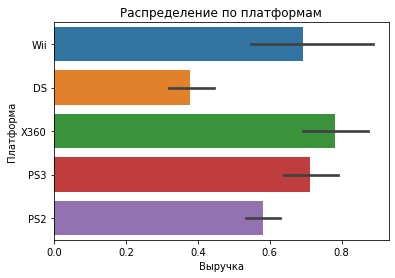

In [19]:
# Построим диаграмму распределения 
import seaborn as sns
sns.barplot(data=total_top, x='total_sales', y='platform')
plt.title('Распределение по платформам')
plt.ylabel('Платформа')
plt.xlabel('Выручка')

Вывод: по диаграмме распределения видно что выручка не привышает 8 млн. долларов. 

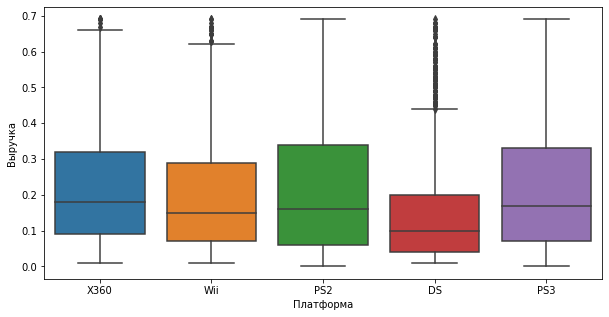

In [20]:
#total_income = total_top.groupby('platform')['total_sales'].sum().reset_index()
#sns.catplot(data=total_income, x='total_sales', kind='box')
top_quantile = total_top['total_sales'].quantile(0.75)
low_quantile = total_top['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(10,5))
sns.boxplot(x='platform', y='total_sales', data=total_top.query('total_sales <= @threshold'), orient='v', ax=ax)

plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.show()

Вывод: Основная часть значений находится в промежутке 800 - 920 млн. долларов. 
Топ 5 самых прибыльных платформ 'PS2', 'X360', 'PS3', 'Wii', 'DS'.

Выбирем актуальный период с 2011 по 2016 гг. Расммотрим как менялись продажи и какие игры были самые популярные.

In [21]:
top_platform = (df.query('year_of_release >= 2013')
                .groupby('platform')['total_sales'].sum().sort_values(ascending=False).
                reset_index().head()
               )

In [22]:
top_5 = top_platform['platform'].to_list()
top_5

['PS4', 'PS3', 'XOne', '3DS', 'X360']

In [23]:
total_top_5 = df.query('platform in @top_5').reset_index(drop=True)

Text(0.5, 0, 'Выручка')

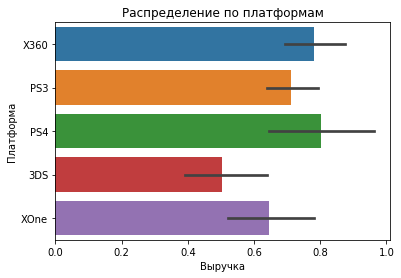

In [24]:
sns.barplot(data=total_top_5, x='total_sales', y='platform')
plt.title('Распределение по платформам')
plt.ylabel('Платформа')
plt.xlabel('Выручка')

Вывод: Можно сделать вывод, что те компании кто развивает свои платформы доходы сопастовимы чем в предыдущие периоды.

Оценка критиков/пользователей

In [25]:
total_top_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 12 columns):
name               3689 non-null object
platform           3689 non-null object
year_of_release    3689 non-null int64
genre              3689 non-null object
na_sales           3689 non-null float64
eu_sales           3689 non-null float64
jp_sales           3689 non-null float64
other_sales        3689 non-null float64
critic_score       3689 non-null int64
user_score         3689 non-null int64
rating             3689 non-null object
total_sales        3689 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 346.0+ KB


Text(0, 0.5, 'Выручка')

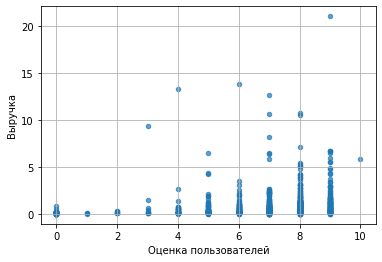

In [26]:
(total_top_5.query('platform == "PS3" and user_score != -1')
 .plot(y='total_sales', x='user_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

In [27]:
total_top_5['total_sales'].corr(total_top_5['user_score'])

0.2099979797604657

Text(0, 0.5, 'Выручка')

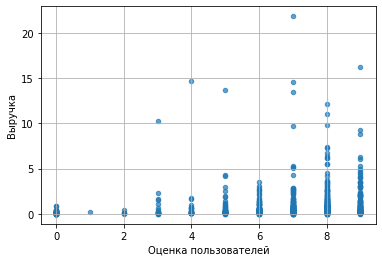

In [28]:
(total_top_5.query('platform == "X360" and user_score != -1')
 .plot(y='total_sales', x='user_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

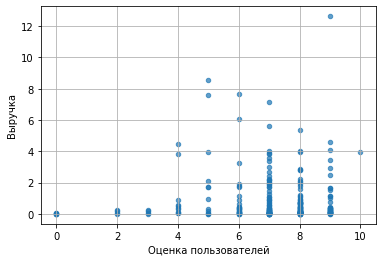

In [29]:
(total_top_5.query('platform == "PS4" and user_score != -1')
 .plot(y='total_sales', x='user_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

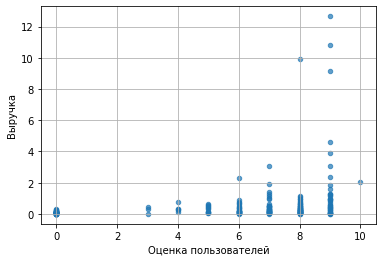

In [30]:
(total_top_5.query('platform == "3DS" and user_score != -1')
 .plot(y='total_sales', x='user_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

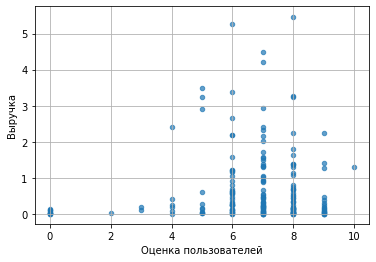

In [31]:
(total_top_5.query('platform == "XOne" and user_score != -1')
 .plot(y='total_sales', x='user_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

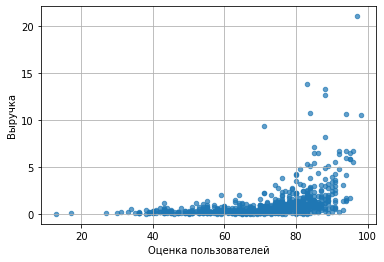

In [32]:
(total_top_5.query('platform == "PS3" and critic_score != -1')
 .plot(y='total_sales', x='critic_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

In [33]:
total_top_5['total_sales'].corr(total_top_5['critic_score'])

0.29717667074431114

Text(0, 0.5, 'Выручка')

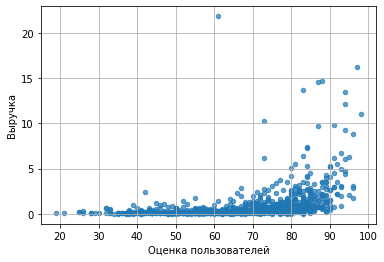

In [34]:
(total_top_5.query('platform == "X360" and critic_score != -1')
 .plot(y='total_sales', x='critic_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

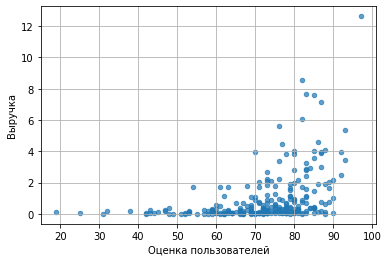

In [35]:
(total_top_5.query('platform == "PS4" and critic_score != -1')
 .plot(y='total_sales', x='critic_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

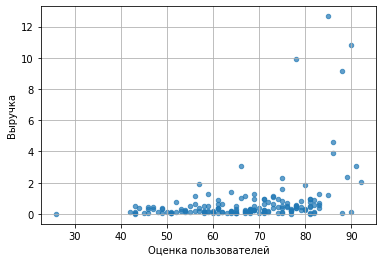

In [36]:
(total_top_5.query('platform == "3DS" and critic_score != -1')
 .plot(y='total_sales', x='critic_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Text(0, 0.5, 'Выручка')

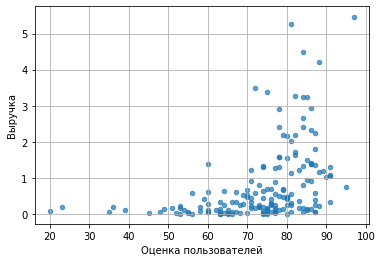

In [37]:
(total_top_5.query('platform == "XOne" and critic_score != -1')
 .plot(y='total_sales', x='critic_score', grid=True, kind='scatter', alpha=0.7))
plt.xlabel('Оценка пользователей')
plt.ylabel('Выручка')

Вывод: Оценка критиков/пользователей в пределах 0,3 зависимость положительная но слабая.

Рассмотрим самые популярные жанры для топ 5 платформ 

In [38]:
(total_top_5.pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False))

,total_sales
genre,
Action,725.83
Shooter,618.02
Sports,358.34
Role-Playing,268.78
Racing,172.24
Misc,160.49
Fighting,110.09
Platform,81.76
Simulation,53.05


Вывод: Самые популярные жанры Action, Shooter, Sports, самые не популярные Adventure, Strategy, Puzzle.

<div class="alert alert-info"><b>Комментарий студента V1:</b> 
    
Рассмотрел актуальный период за 2013 - 2016 гг., для топ 5 платформ.
    
Вывод: 
    
- Жизненый цикл платформы 8 лет;
    
- В топ 5 платформ входят производители которые постоянно развиваю свои приставки;
    
- Выручка зависит от оценки критиковв большей степени чем от оценки пользователей.
    
- Самые популярные жанры Action, Shooter, Sports;
    
- Самые не популярные Adventure, Strategy, Puzzle.
 
Общий вывод на 2017 г., платформы от компаний Microsoft и Sony будут пользоватся большим спросом, т.к. из анализа периода с 2000 по 2016 платформы этих производителей входили в топ 5 рейтинга.    
</div>

## Портрет пользователя из разных регионов

### Самые популярные платформы (топ-5)

In [39]:
# Топ 5 платформ по регионам
for index in ['na_sales', 'eu_sales', 'jp_sales']:
    region_top = (total_top_5.groupby('platform')[index].sum().reset_index()
                  .sort_values(by=index, ascending=False)
                  )
    print(region_top)    
    print()

  platform  na_sales
3     X360    595.74
1      PS3    390.13
2      PS4    108.74
4     XOne     93.12
0      3DS     82.65

  platform  eu_sales
1      PS3    327.21
3     X360    268.32
2      PS4    141.09
0      3DS     61.27
4     XOne     51.59

  platform  jp_sales
0      3DS    100.62
1      PS3     79.41
2      PS4     15.96
3     X360     12.30
4     XOne      0.34



Вывод:

- В Америке: ~ 50% рынка занимает Microsoft. Это логично так как для данной корпорации это национальный рынок. Sony ~ 30% платформы этого производителя одни из самых популярных в мире.

- В Европе: ~ 60% рынка платформы от Sony. Microsoft занимает ~ 30%.

- В Японии: Nintendo и Sony национальные корпорации ~ 90% рынка занимают они. Так же можно отметить игровые платформы менее популярны чем в Европе и Америке.

### Самые популярные жанры (топ-5)

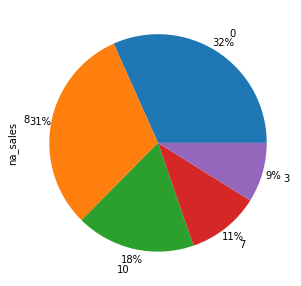

           genre  na_sales
0         Action    333.84
8        Shooter    325.66
10        Sports    186.61
7   Role-Playing    113.93
3           Misc     93.64



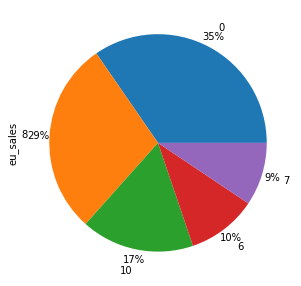

           genre  eu_sales
0         Action    245.37
8        Shooter    204.17
10        Sports    119.20
6         Racing     73.69
7   Role-Playing     66.61



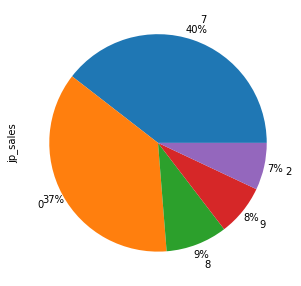

          genre  jp_sales
7  Role-Playing     64.92
0        Action     60.39
8       Shooter     15.02
9    Simulation     12.48
2      Fighting     11.50



In [47]:
# Топ 5 жанров по регионам
for index in ['na_sales', 'eu_sales', 'jp_sales']:
    region_top = (total_top_5.groupby('genre')[index].sum().reset_index()
                  .sort_values(by=index, ascending=False).head()
                  )
    region_top.plot.pie(y=index, legend=False, pctdistance=1.1, labeldistance=1.2, autopct='%1.0f%%', figsize=(10,5))
    plt.show()
    print(region_top)    
    print()

Вывод:

- В Америке: одинаково популярны жанры Action и Shooter.

- В Европе: на первом месте Action, на втором Shooter .

- В Японии: популярны жанры Role-Playing и Action.

Action, Shooter, Role-Playing входят в топ 5 в каждом из регионов. Это логично так как люди в основном играют в динамичные игры, чтоб отвлечся от повседневной жизни.

### Влияет ли рейтинг ESRB на продажи

In [41]:
# Топ 5 по регионам
for index in ['na_sales', 'eu_sales', 'jp_sales']:
    region_top = (total_top_5.groupby('rating')[index].sum().reset_index()
                  .sort_values(by=index, ascending=False).head()
                  )
    print(region_top)    
    print()

  rating  na_sales
2      M    519.00
4      T    251.14
0      E    250.03
3     RP    125.62
1   E10+    124.59

  rating  eu_sales
2      M    340.16
0      E    177.24
4      T    142.91
3     RP    118.36
1   E10+     70.81

  rating  jp_sales
3     RP     94.83
4      T     39.04
2      M     36.65
0      E     31.72
1   E10+      6.39



В Америке и Европе популярны игры с возрастным рейтингом 16+, возможно из-за законодательных норм этих регионов большая часть игр с рейтингом 16+.

В Японии популярны игры с возрастным рейтингом 13+, скорей всего связанно с тем что взрослое население большую часть времени проводит на работе и времени на игры не остается.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

- H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны
- H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [42]:
#зададим критический уровень статистической значимости
alpha = 0.05

In [43]:
df_2011 = df.query('year_of_release >= 2013')
xone = df_2011.query('platform == "XOne" and user_score != "-1"')
pc = df_2011.query('platform =="PC" and user_score != "-1"')


In [44]:
from scipy import stats as st
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', xone['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг платформы PC -', pc['user_score'].mean().round(2))

p-значение: 0.6541323641904699
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.61
Cредний пользовательский рейтинг платформы PC - 6.51


Рейтинг XOne и PC одинаковый.

### Средние пользовательские рейтинги жанров Action и Sports разные?

- H₀ - средние пользовательские рейтинги жанров Action и Sports равны
- H₁ - средние пользовательские рейтинги жанров Action и Sports не равны

In [45]:
action = df_2011.query('genre == "Action" and user_score != "-1"')
sports = df_2011.query('genre =="Sports" and user_score != "-1"')

In [46]:
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', action['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг жанра Sports -', sports['user_score'].mean().round(2))

p-значение: 1.357957573102544e-08
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 6.56
Cредний пользовательский рейтинг жанра Sports - 5.29


То что жанры практически равны по популярности было видно выше из данных.

## Общий вывод

<div class="alert alert-info"><b>Комментарий студента:</b> 

При планирование рекламной компании на 2017 год:
    
- Платформы от компаний Microsoft и Sony самые популярные, постоянно развиваются и приносят стабильный доход.
    
- Самые популярные жанры Action, Shooter, Sports, Role-Playing с рейтингом ESRB 16+.
    
- В Японие есть особенности: самая популярная платформа Nintendo, там популярен жанры Action, Role-Playing.
    
</div>

<div class="alert alert-info"><b>Комментарий студента V1:</b> 
    
- Срок жизни платформы около 8 лет.
    
- Отсутствует зависимость от оценки пользователей и продажами для топовых платфором, а от оценки критиков продажи имеют прямую зависимость.
    
- После актуализации выяснили что для Японии рейтинг ESRB не актуален, у них своя маркировка. По этому скорей всего платформа Nintendo более популярна.
    
Проверка гипотез:
    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся.
    
- Средние пользовательские рейтинги жанров Action  и Sports разные. Получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей, соответственно делать какие либо выводы по данным от разных жанров мы не можем.
    
</div>